# Лабораторная работа №3. 
## Модуляция. Линейно частотно модулированные сигналы. Снятие с несущей частоты. Быстрая свертка
                                                                                                    
Выполнил студент ИВТ-31: Петров Дмитрий

##### Формирование ЛЧМ-импульса на несущей частоте

Amplitude (theory) = 43.89228415901424


c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Dmitry\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


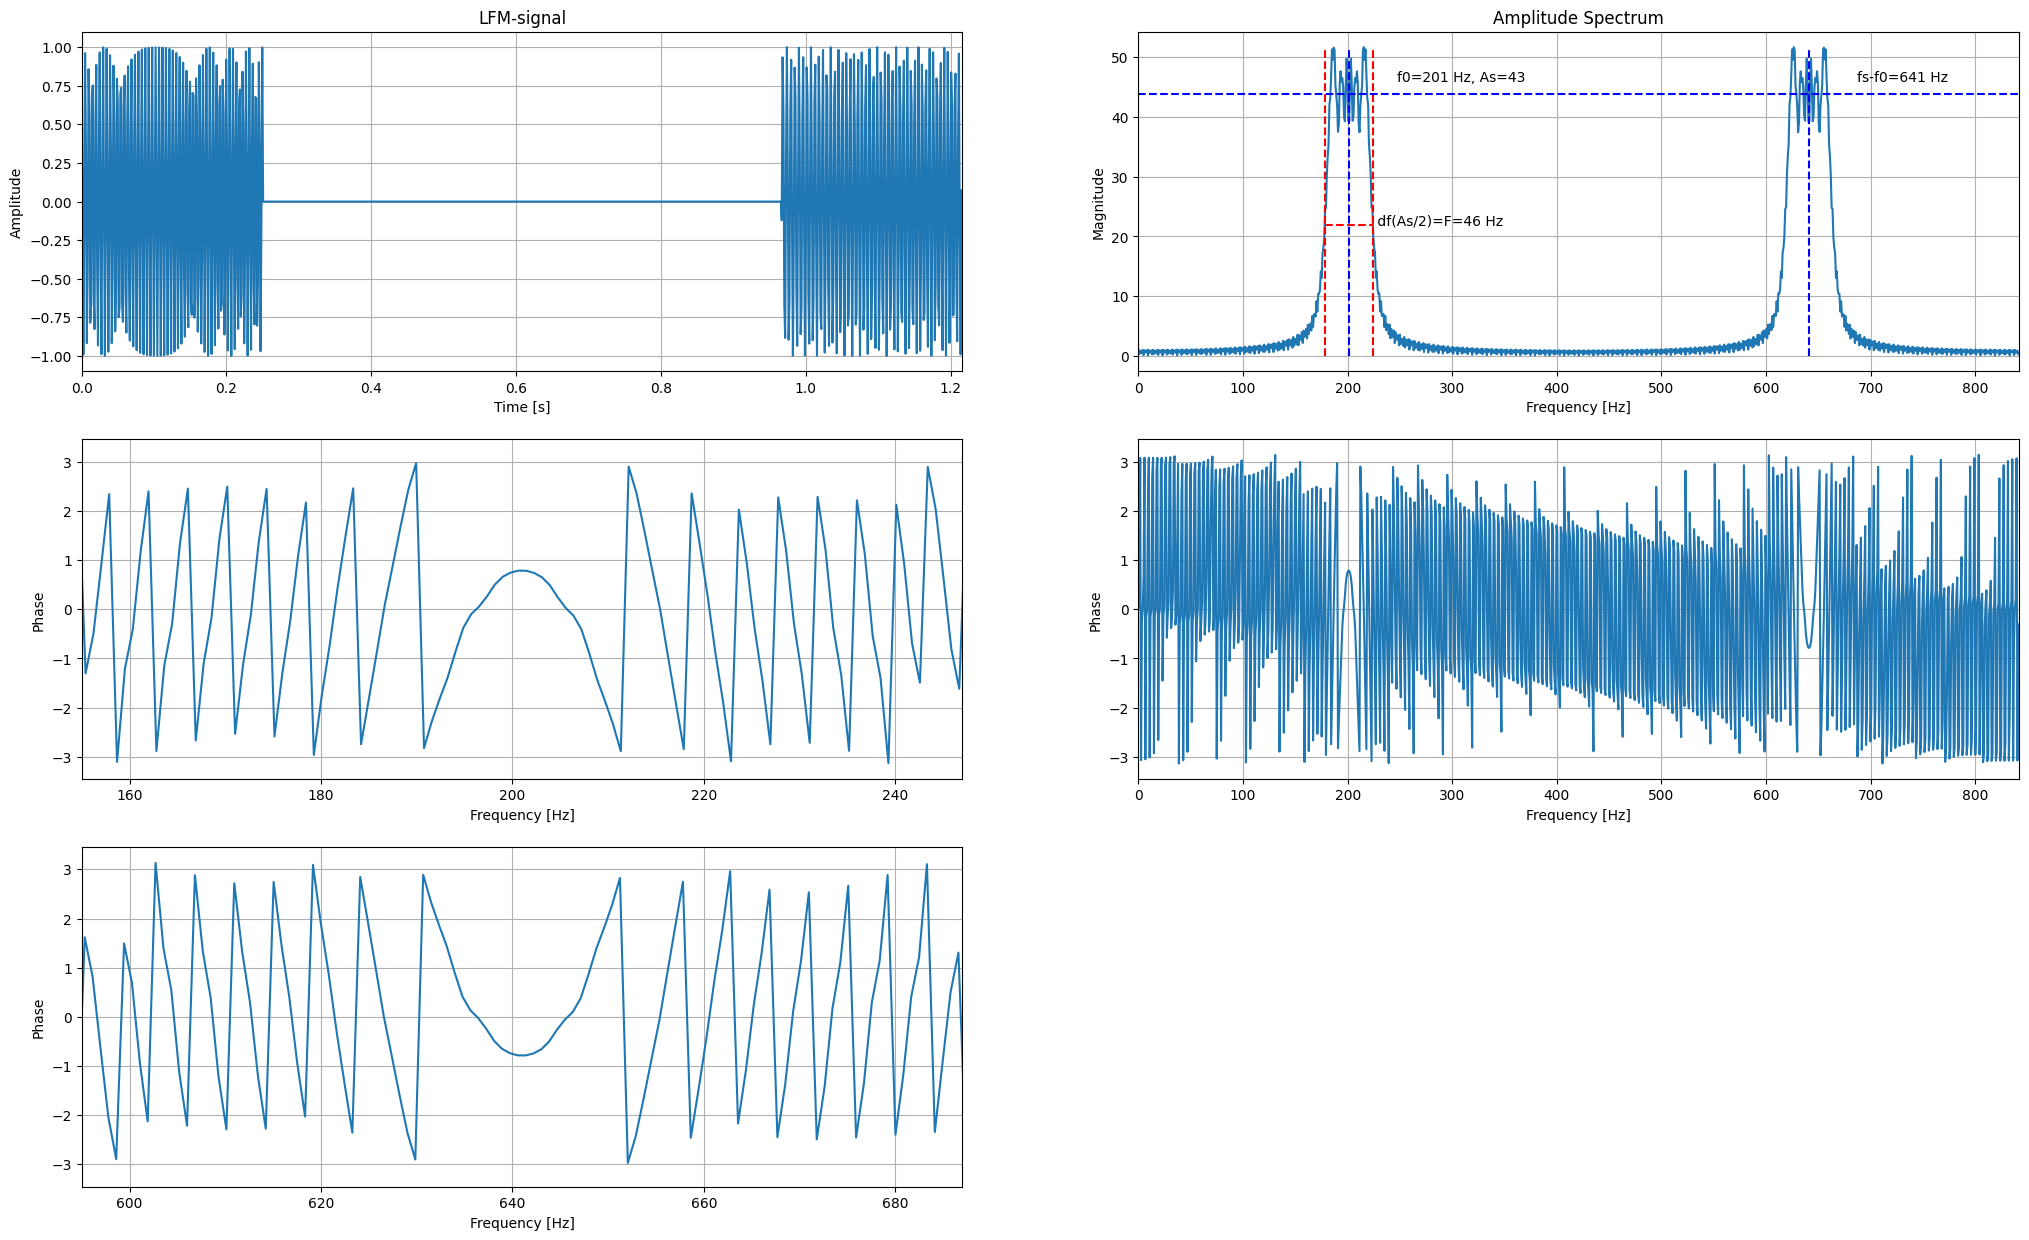

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import scipy.integrate as spi
from scipy.fftpack import fft, fftfreq, ifft
from scipy.signal import find_peaks
from sympy.solvers import solve
from sympy import Symbol

num = 21

fs   = 800 + 2 * num    # Частота дискретизации, Гц
f0   = 180 + num        # Несущая частота, Гц
df   = 25 + num         # Полоса ЛЧМ-сигнала, Гц
N    = 1024             # Количество дискретов (период сигнала в дискретах)
Ni   = 400 + num        # Длительность ЛЧМ-импульса
A    = num / 30         # Амплитуда исходного сигнала, В
phi0 = 2 * np.pi / num  # Начальная фаза

# fs = 25e3      # Частота дискретизации, Гц
# f0 = 3000      # Несущая частота, Гц
# df = 1200      # Полоса ЛЧМ-сигнала, Гц
# N = 8192       # Количество дискретов (период сигнала в дискретах)
# Ni = 1001      # Длительность ЛЧМ-импульса
# A = 0.3        # Амплитуда отраженного сигнала, В
# phi0 = 2 * np.pi/ 21 # Начальная фаза отраженного ЛЧМ-сигнала, рад

T    = 1 / fs           # Период дискретизации
tau  = N*T              # Период сигнала в секундах

tt = np.linspace( 0, tau, N, endpoint=False )
ff = np.linspace( 0, fs,  N, endpoint=False )

a = ( df * T )/ Ni 
b = 2 * f0 * T
s = np.zeros( N, dtype=complex )
n = np.linspace( math.ceil((- Ni) / 2), Ni / 2, Ni, dtype=int)
for i in n:
  s[i % N] = np.cos( np.pi * ( a * i ** 2 + b * i ) )

As = 0.5 * np.sqrt( Ni / (df * T))
print( 'Amplitude (theory) =', As )

sft = np.abs( fft( s ) )
P = np.arctan2( np.imag(fft( s ) ), np.real( fft( s ) ) )

plt.figure( figsize=( 25, 15 ) )

plt.subplot( 3, 2, 1 )
plt.title( 'LFM-signal' )
plt.plot( tt, s )
plt.xlim( [0, tau] )
plt.grid( True )
plt.xlabel( 'Time [s]' )
plt.ylabel( 'Amplitude' )

plt.subplot( 3, 2, 2 )
plt.title( 'Amplitude Spectrum' )
plt.plot( ff, sft )
plt.plot( [f0-df/2,f0-df/2],[0, np.max(sft)], 'r--' )
plt.plot( [f0+df/2,f0+df/2],[0, np.max(sft)], 'r--' )
plt.plot( [f0-df/2,f0+df/2],[As/2 , As/2 ], 'r--' )
plt.plot( [f0,f0], [0, np.max(sft)], 'b--' )
plt.plot( [0,fs],[As, As], 'b--' )
plt.annotate( ( 'f0=%d Hz, As=%d'%(f0, As) ), ( f0+df, As + 2 ) )
plt.annotate( ( ' df(As/2)=F=%d Hz'%df ), ( f0+df/2, As/2 ) )
plt.plot( [fs-f0,fs-f0], [0, np.max(sft)], 'b--' )
plt.annotate( ( 'fs-f0=%d Hz'%(fs-f0) ), ( fs-f0+df, As + 2 ) )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Magnitude' )

plt.subplot( 3, 2, 4 )
plt.plot( ff, P )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )
plt.xlim( [0, fs] )

plt.subplot( 3, 2, 3 )
plt.plot( ff, P )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )
plt.xlim( [f0-df, f0+df] )

plt.subplot( 3, 2, 5 )
plt.plot( ff, P )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )
plt.xlim( [fs-f0-df, fs-f0+df] )
plt.show()



##### Формирование отраженного ЛЧМ-импульса с расположением от нуля

Amplitude (theory) = 30.724598911309965


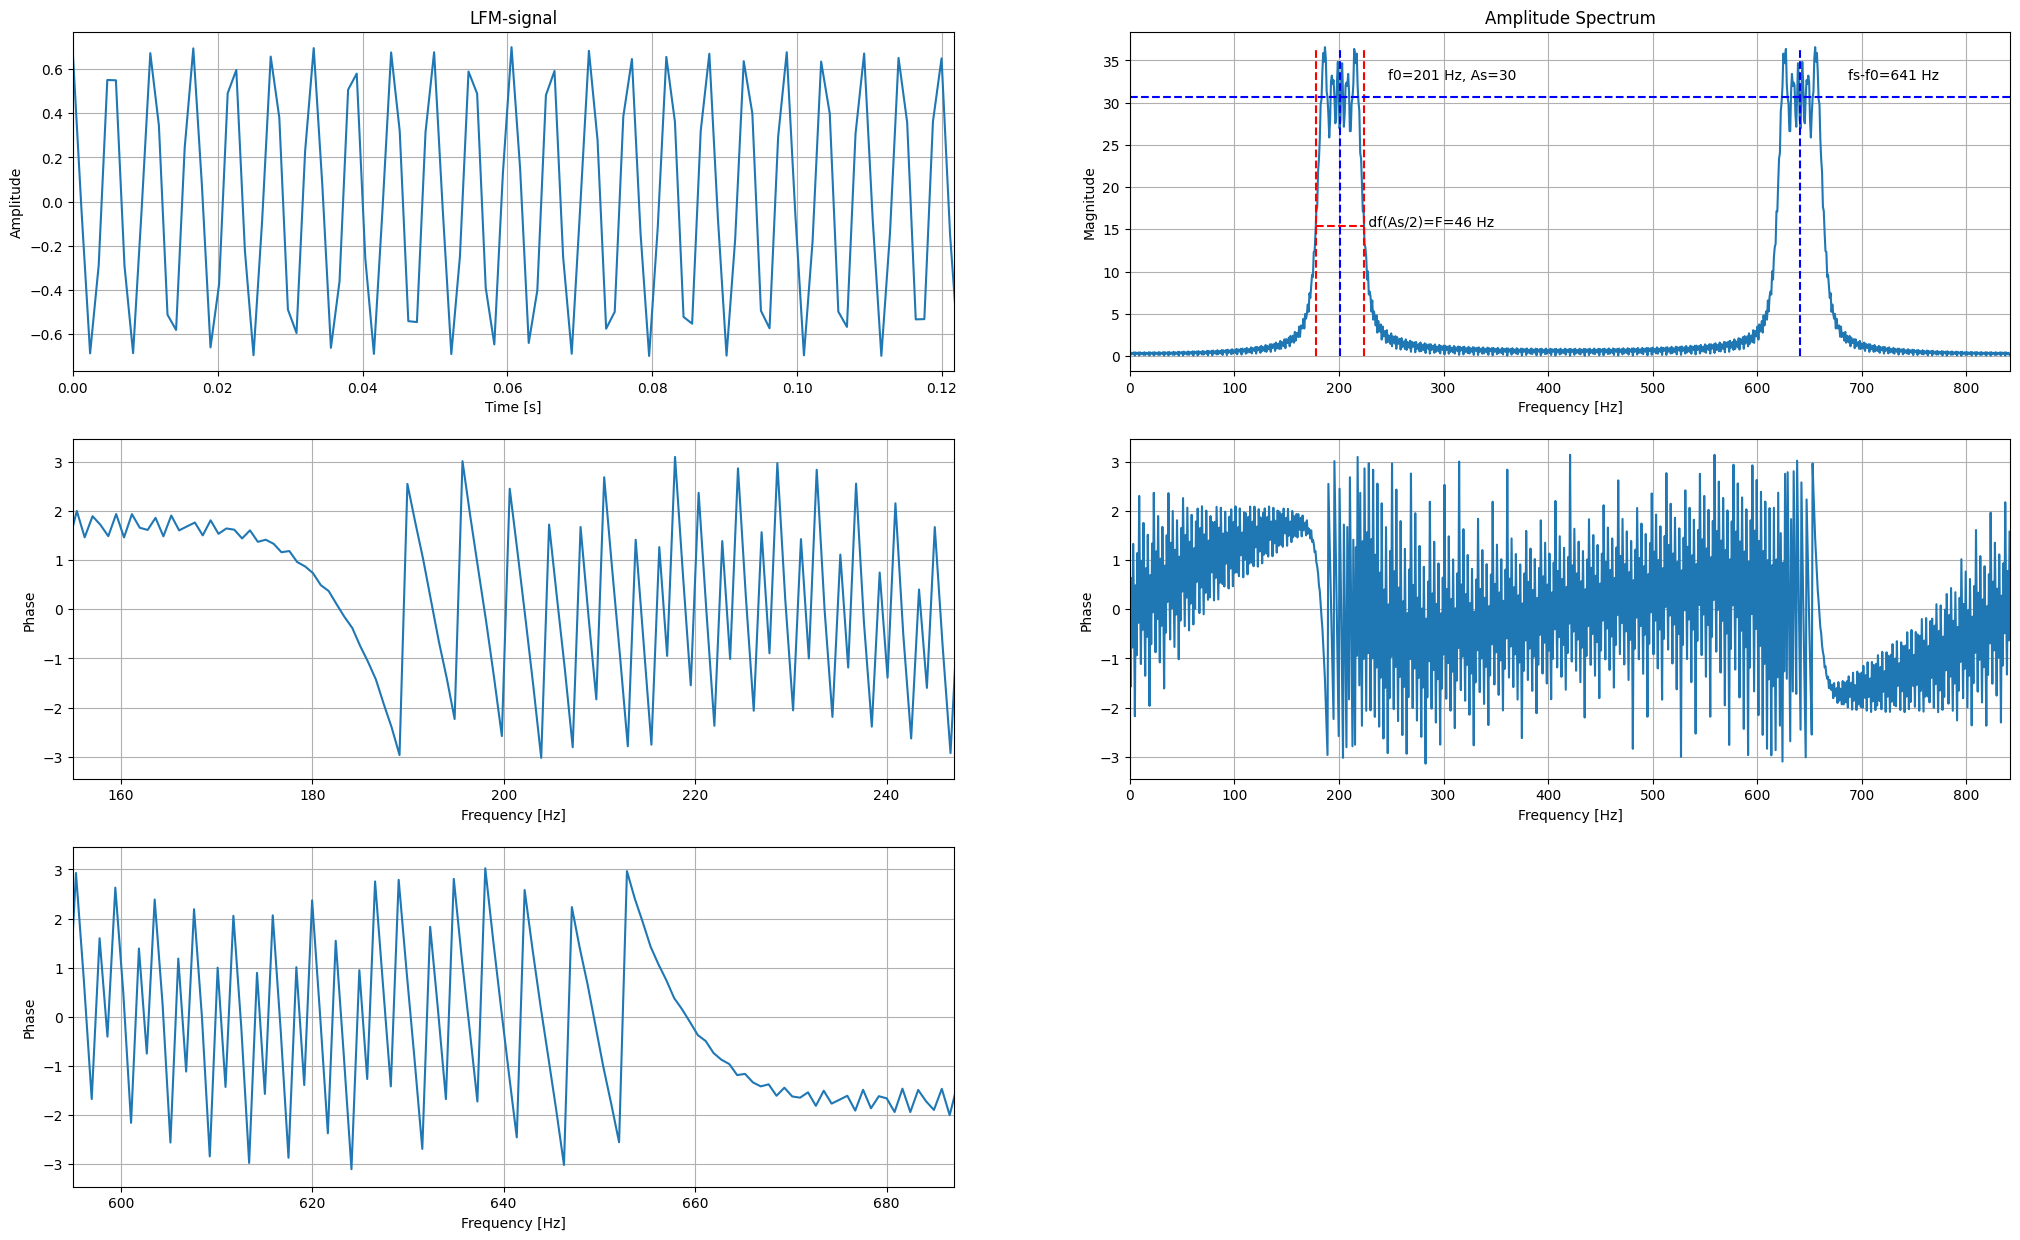

In [2]:

a = (df * T)/(Ni)
b = 2 * f0 * T - df* T
c = phi0 / np.pi
s = np.zeros(N, dtype=complex)
n = np.linspace(0, Ni - 1, Ni, dtype=int)
for i in n:
  s[i % N] = A * np.cos(np.pi * (a * (i ** 2) + b * i + c))

As = 0.5 * A * np.sqrt( Ni / (df * T))
print( 'Amplitude (theory) =', As )

sft = np.abs( fft( s ) )
P = np.arctan2( np.imag( fft( s ) ), np.real( fft( s ) ) )

plt.figure( figsize=( 25, 15 ) )
plt.subplot( 3, 2, 1 )
plt.title( 'LFM-signal' )
plt.plot( tt, s )
plt.xlim( [0, tau / 10] )
plt.grid( True )
plt.xlabel( 'Time [s]' )
plt.ylabel( 'Amplitude' )

plt.subplot( 3, 2, 2 )
plt.title( 'Amplitude Spectrum' )
plt.plot( ff, sft )
plt.plot( [f0-df/2,f0-df/2],[0, np.max(sft)], 'r--' )
plt.plot( [f0+df/2,f0+df/2],[0, np.max(sft)], 'r--' )
plt.plot( [f0-df/2,f0+df/2],[As/2 , As/2 ], 'r--' )
plt.plot( [f0,f0], [0, np.max(sft)], 'b--' )
plt.plot( [0,fs],[As, As], 'b--' )
plt.annotate( ( 'f0=%d Hz, As=%d'%(f0, As) ), ( f0+df, As + 2 ) )
plt.annotate( ( ' df(As/2)=F=%d Hz'%df ), ( f0+df/2, As/2 ) )
plt.plot( [fs-f0,fs-f0], [0, np.max(sft)], 'b--' )
plt.annotate( ( 'fs-f0=%d Hz'%(fs-f0) ), ( fs-f0+df, As + 2 ) )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Magnitude' )

plt.subplot( 3, 2, 4 )
plt.plot( ff, P )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )
plt.xlim( [0, fs] )

plt.subplot( 3, 2, 3 )
plt.plot( ff, P )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )
plt.xlim( [f0-df, f0+df] )

plt.subplot( 3, 2, 5 )
plt.plot( ff, P )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )
plt.xlim( [fs-f0-df, fs-f0+df] )
plt.show()

##### Квадратурная демодуляция, снятие с несущей частоты

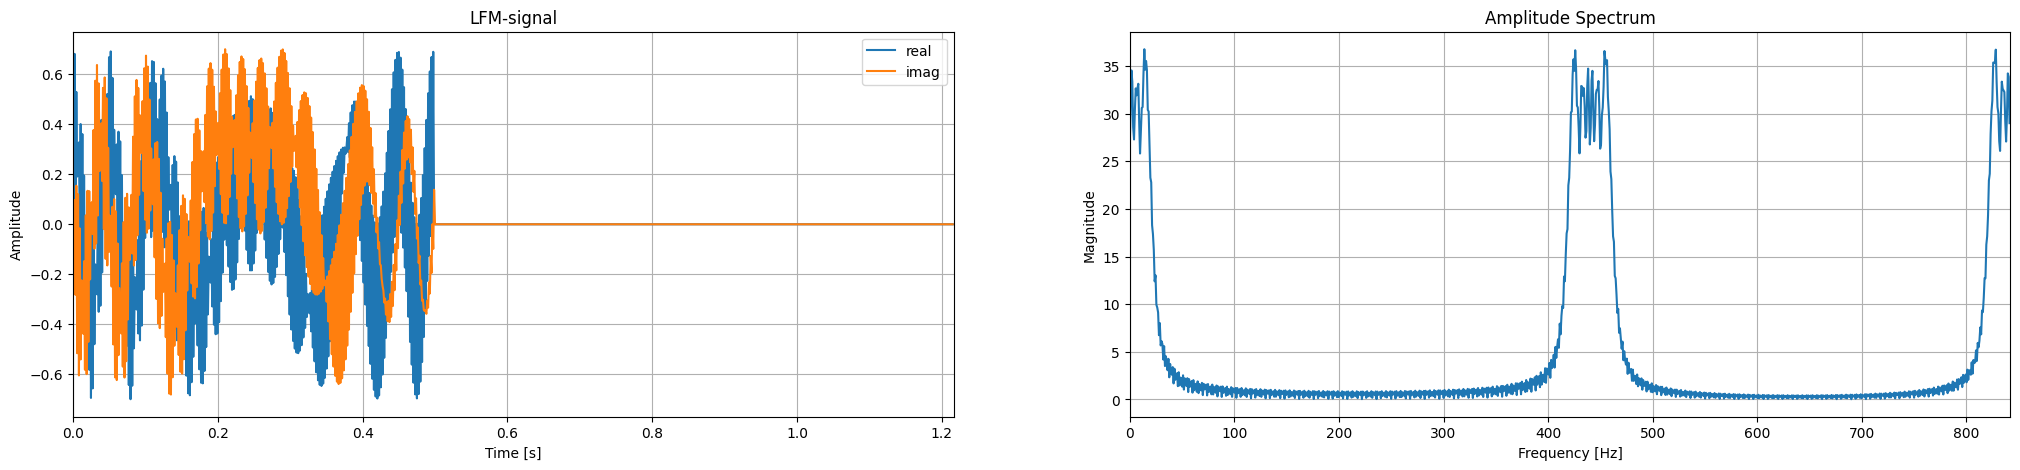

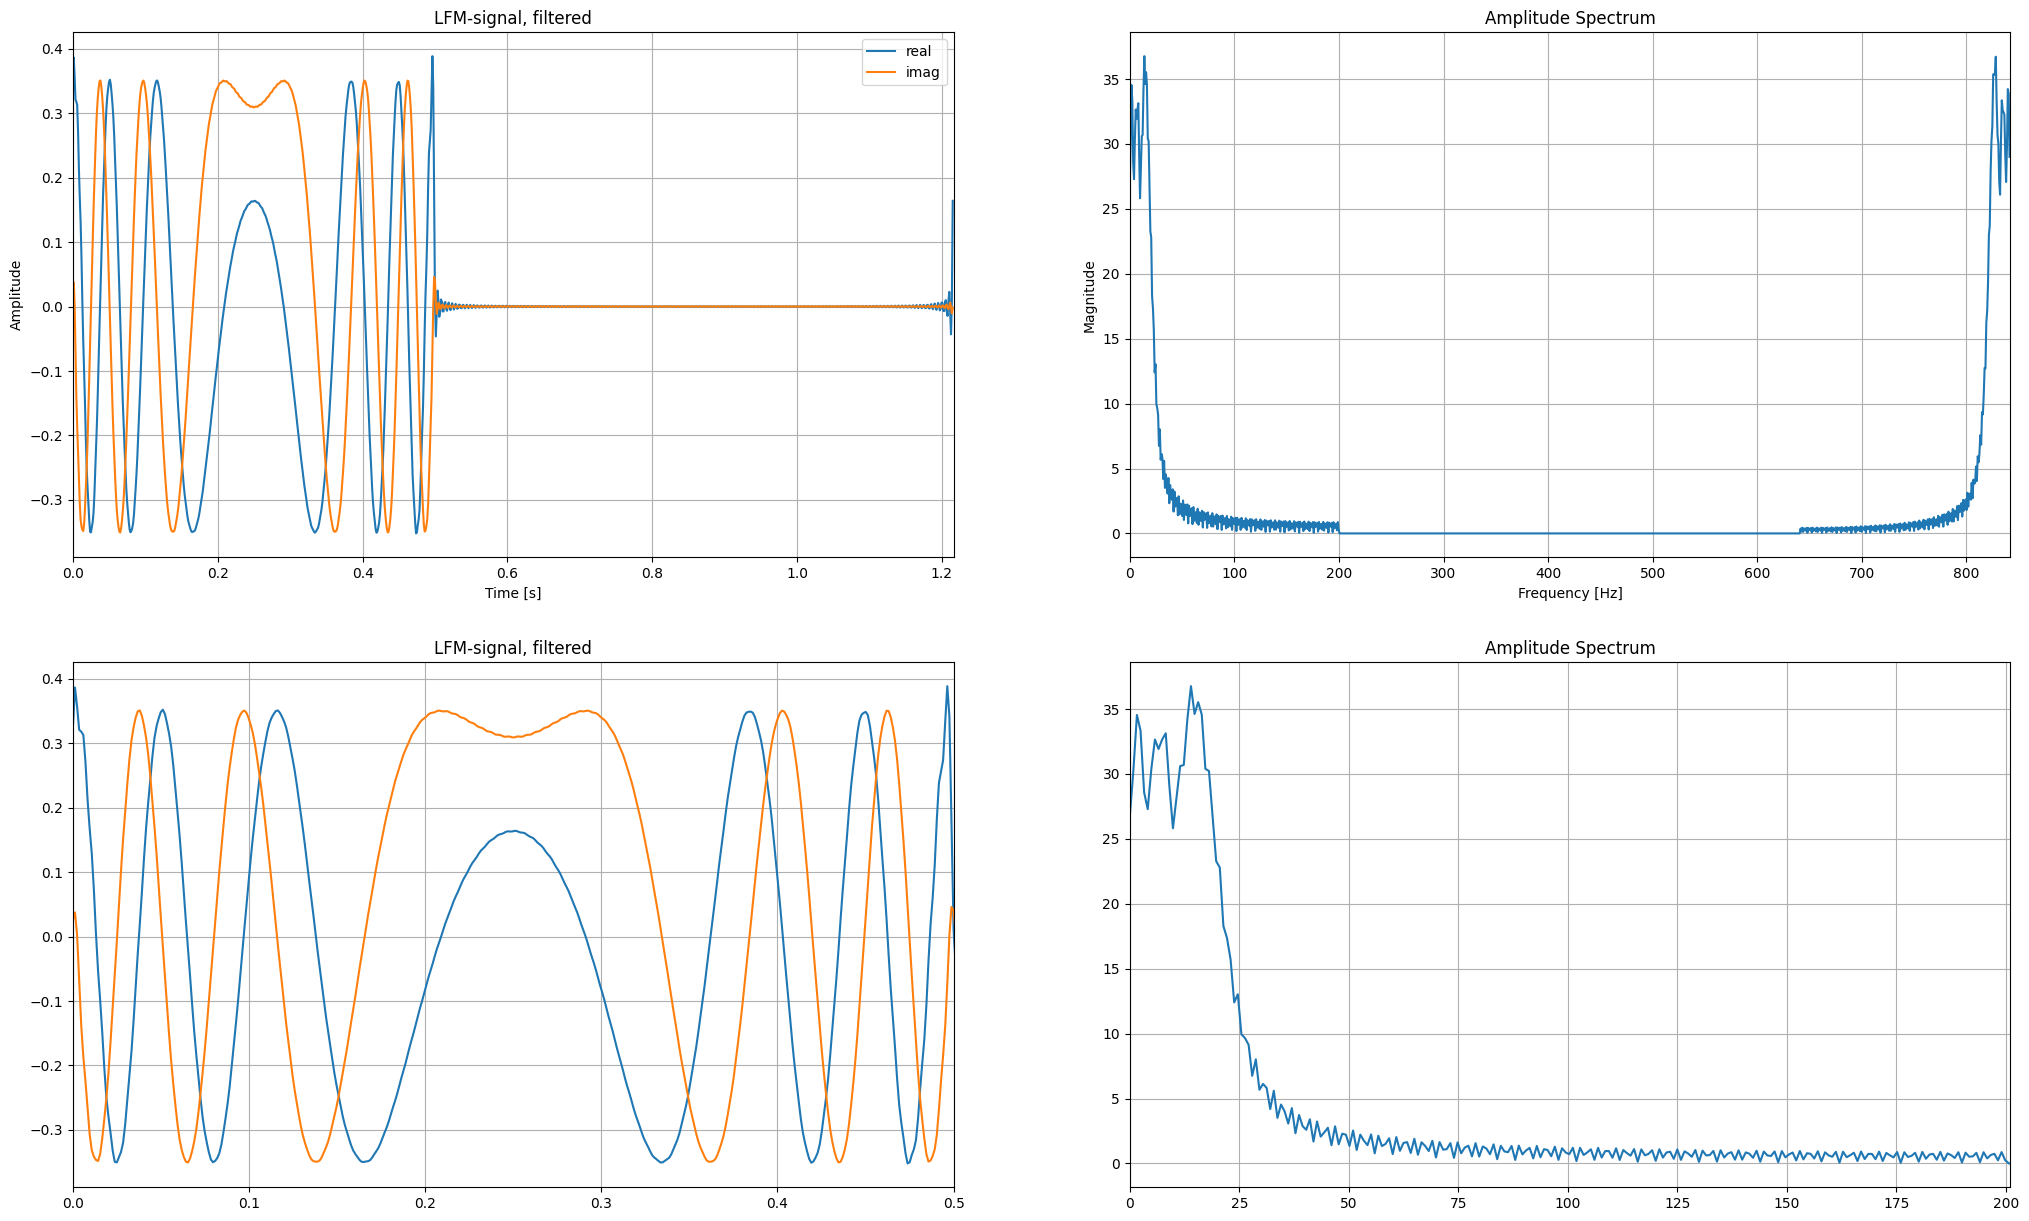

In [3]:
s_demod = np.zeros(N, dtype=complex)
n = np.linspace(0, Ni - 1, Ni, dtype=int)

a = (df * T)/(Ni)
b = 2 * f0 * T - df* T
c = phi0 / np.pi

for i in n:
  s_demod[i % N] = A * np.cos(np.pi * (a * (i ** 2) + b * i + c)) * np.exp(-1j * (2 * np.pi * f0 * i * T))

# Амплитудный спектр FМ-сигнала
sft_s = np.abs( fft( s_demod ) )

# Пример реализации идеального ФНЧ в частотной области
lowpass = np.ones( N )
Nc = int( np.round( f0 * N / fs ) )
lowpass[Nc:N-Nc] = 0

spec_filtered = fft( s_demod ) * lowpass # спектр сигнала после применения ФНЧ
s_filtered = ifft( spec_filtered ) # сигнал во временной области после применения ФНЧ

plt.figure( figsize=( 25, 5 ) )

plt.subplot( 1, 2, 1 )
plt.title( 'LFM-signal' )
plt.plot( tt, np.real( s_demod ) )
plt.plot( tt, np.imag( s_demod ) )
plt.legend( ['real', 'imag'] )
plt.xlim( [0, tau] )
plt.grid( True )
plt.xlabel( 'Time [s]' )
plt.ylabel( 'Amplitude' )

plt.subplot( 1, 2, 2 )
plt.title( 'Amplitude Spectrum' )
plt.plot( ff, sft_s )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Magnitude' )

plt.figure( figsize=( 25, 15 ) )

plt.subplot( 2, 2, 1 )
plt.title( 'LFM-signal, filtered' )
plt.plot( tt, np.real( s_filtered ) )
plt.plot( tt, np.imag( s_filtered ) )
plt.legend( ['real', 'imag'] )
plt.xlim( [0, tau] )
plt.grid( True )
plt.xlabel( 'Time [s]' )
plt.ylabel( 'Amplitude' )

plt.subplot( 2, 2, 2 )
plt.title( 'Amplitude Spectrum' )
plt.plot( ff, np.abs( spec_filtered ) )
plt.xlim( [0, fs] )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Magnitude' )

plt.subplot( 2, 2, 3 )
plt.title( 'LFM-signal, filtered' )
plt.plot( tt, np.real( s_filtered ) )
plt.plot( tt, np.imag( s_filtered ) )
plt.xlim( [0, 0.5] )
plt.grid( True )

plt.subplot( 2, 2, 4 )
plt.title( 'Amplitude Spectrum' )
plt.plot( ff, np.abs( spec_filtered ) )
plt.xlim( [0, f0] )
plt.grid( True )

plt.show()

##### Формирование сжатого ЛЧМ-сигнала

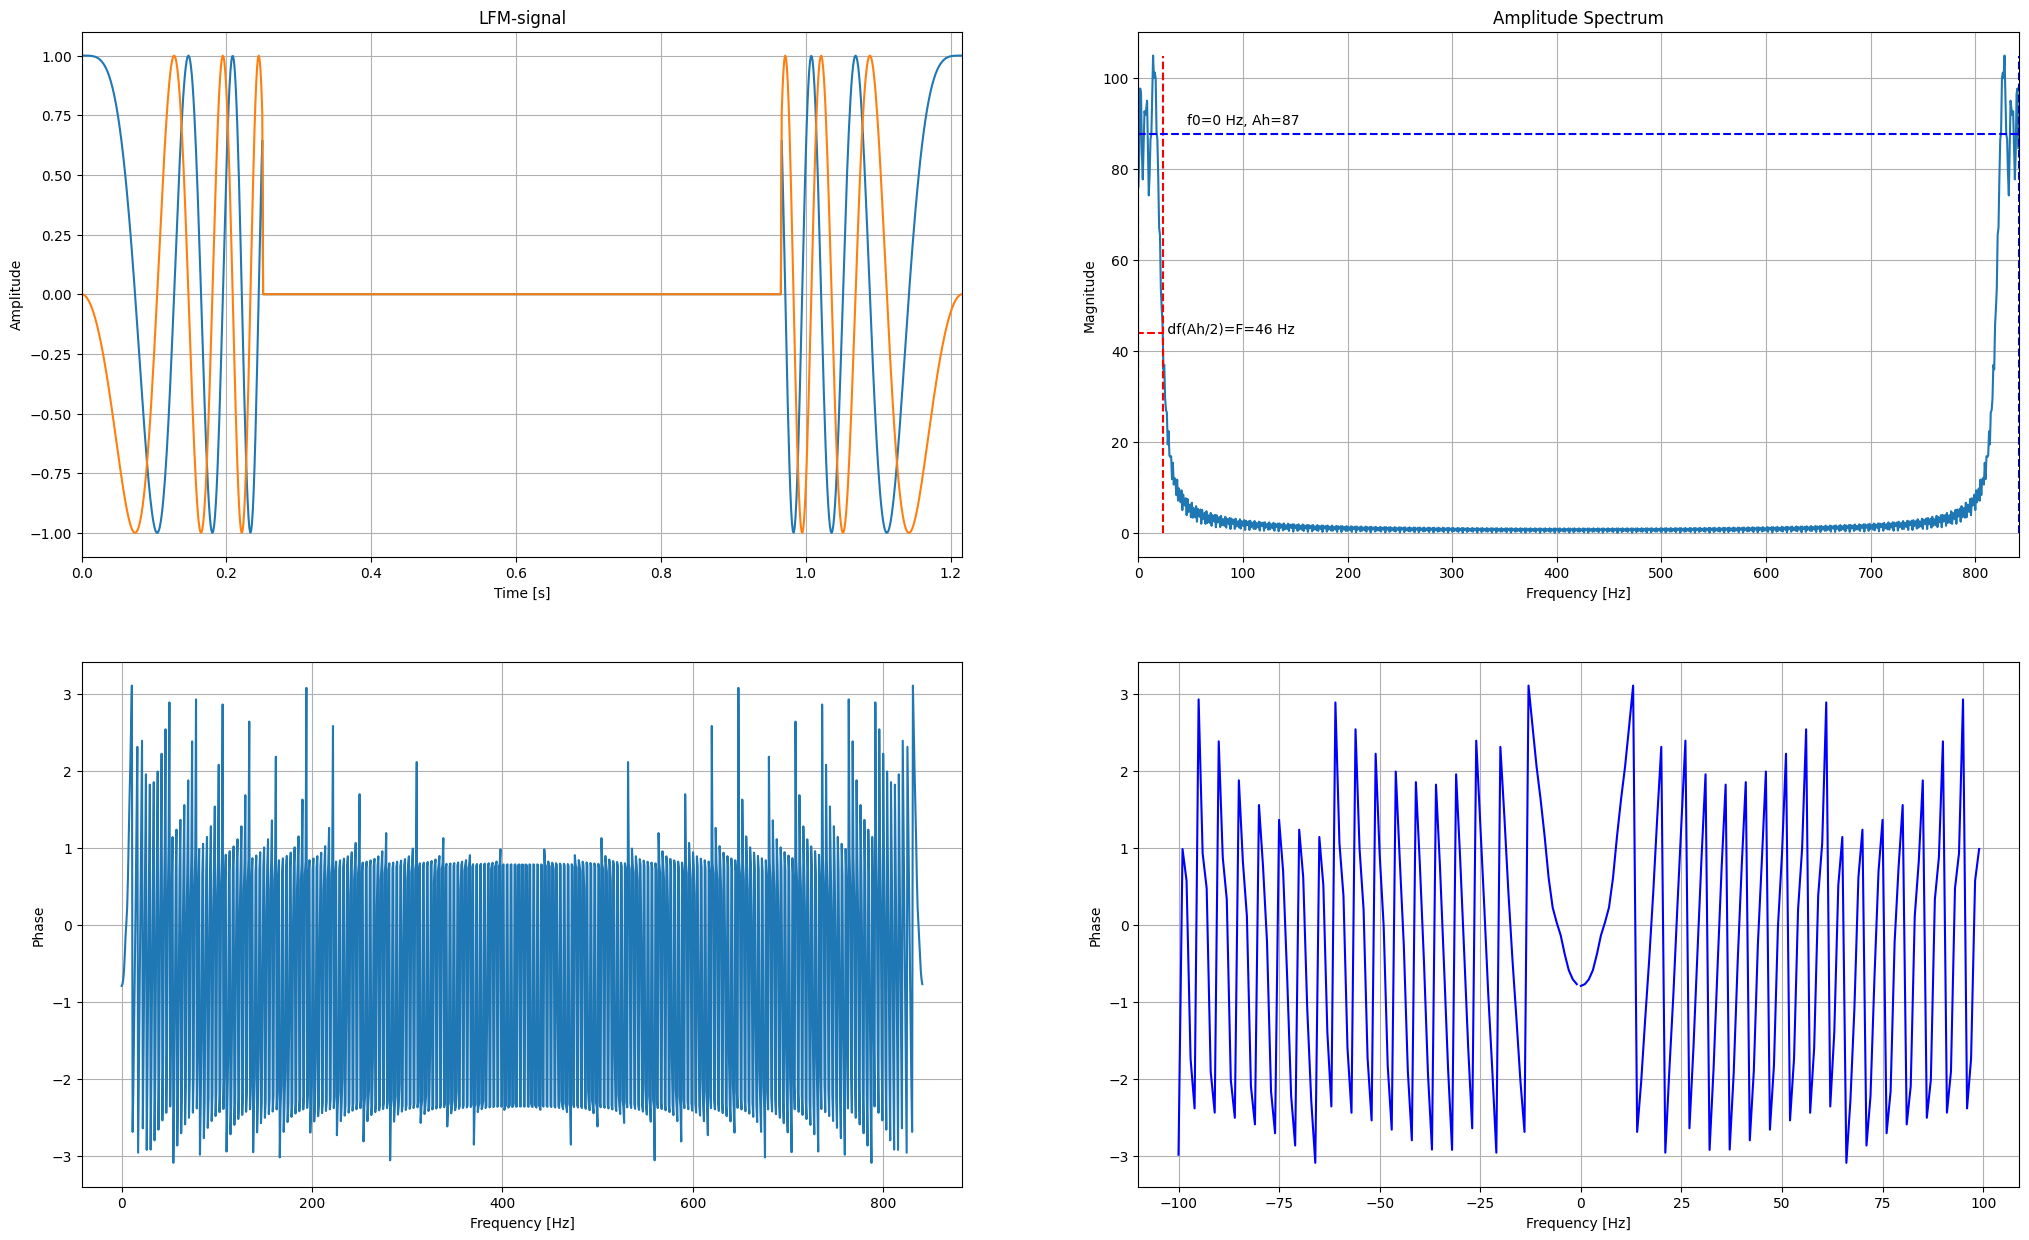

In [4]:
f0 = 0
h = np.zeros(N, dtype=complex)
n = np.linspace(math.ceil((- Ni) / 2), Ni / 2, Ni, dtype=int)
a = (df * T) / Ni
for i in n:
  h[i % N] = np.exp(-1j * np.pi * a * (i ** 2))

Ah = np.sqrt( Ni / (df * T) )

sft = np.abs( fft( h ) )
P = np.arctan2( np.imag( fft( h ) ), np.real( fft( h ) ) )

plt.figure( figsize=( 25, 15 ) )

plt.subplot( 2, 2, 1 )
plt.title( 'LFM-signal' )
plt.plot( tt, np.real( h ) )
plt.plot( tt, np.imag( h ) )
plt.xlim( [0, tau] )
plt.grid( True )
plt.xlabel( 'Time [s]' )
plt.ylabel( 'Amplitude' )

plt.subplot( 2, 2, 2 )
plt.title( 'Amplitude Spectrum' )
plt.plot( ff, sft )
plt.plot( [f0-df/2,f0-df/2], [0, np.max(sft)], 'r--' )
plt.plot( [f0+df/2,f0+df/2], [0, np.max(sft)], 'r--' )
plt.plot( [f0-df/2,f0+df/2], [Ah/2 , Ah/2 ], 'r--' )
plt.plot( [f0,f0], [0, np.max(sft)], 'b--' )
plt.plot( [0,fs], [Ah, Ah], 'b--' )
plt.annotate( ( 'f0=%d Hz, Ah=%d'%(f0, Ah) ), ( f0+df, Ah + 2 ) )
plt.annotate( ( ' df(Ah/2)=F=%d Hz'%df ), ( f0+df/2, Ah/2 ) )
plt.plot( [fs-f0,fs-f0], [0, np.max(sft)], 'b--' )
plt.annotate( ( 'fs-f0=%d Hz'%(fs-f0) ), ( fs-f0+df, Ah + 2 ) )
plt.xlim( [0, fs] ) 
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Magnitude' )

plt.subplot( 2, 2, 3 )
plt.plot( ff, P )
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )

plt.subplot( 2, 2, 4 )
plt.plot(np.linspace(0, len( P[0 : 100] ), len( P[0 : 100] ), endpoint=False), P[0 : 100], 'b' )
plt.plot(np.linspace(-len( P[N - 100 : N] ), 0, len( P[N - 100 : N] ), endpoint=False), P[N - 100 : N], 'b')
plt.grid( True )
plt.xlabel( 'Frequency [Hz]' )
plt.ylabel( 'Phase' )

plt.show()

A (theory) =  147.35
Phase =  0.2991993003418851
Phase =  1.0845652896360807


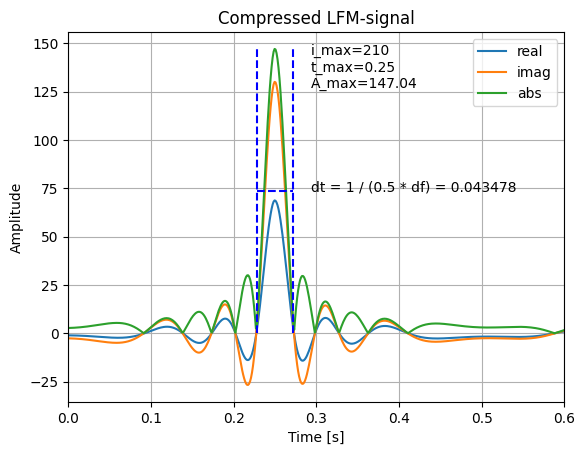

In [5]:

spec_h = fft(h)
s_compgessed = ifft(spec_filtered * spec_h)

dt = 1 / (0.5 * df)
abs_s_compressed = np.abs(s_compgessed) # Модуль сжатого сигнала
i_max = np.argmax(abs_s_compressed) # Положение максимума сжатого сигнала
t_max = i_max * T
phi = np.arctan2(np.imag(s_compgessed[i_max]), np.real(s_compgessed[i_max])) # фаза сжатого сигнала
#print([i for i, x in enumerate(phi) if ( x > 0 and x < 0.1)])
plt.plot(tt, np.real(s_compgessed))
plt.plot(tt, np.imag(s_compgessed))
plt.plot(tt, np.abs(s_compgessed))
plt.title( 'Compressed LFM-signal' )
plt.xlabel( 'Time [s]' )
plt.ylabel( 'Amplitude' )
plt.grid()
plt.xlim( [ 0, 0.6 ] )
plt.legend(['real', 'imag', 'abs'])
plt.plot([t_max+dt/2,t_max+dt/2],[0, np.max(abs_s_compressed)], 'b--')
plt.plot([t_max-dt/2,t_max-dt/2],[0, np.max(abs_s_compressed)], 'b--')
plt.annotate( ('i_max=%d\nt_max=%.2f\nA_max=%.2f'%(i_max,t_max,np.max(abs_s_compressed))), (t_max+dt, np.max(abs_s_compressed) - 20 ) )
plt.annotate( ('dt = 1 / (0.5 * df) = %f'%dt), (t_max+dt, np.max(abs_s_compressed) / 2  ))
plt.plot([t_max-dt/2,t_max+dt/2],[np.max(abs_s_compressed) / 2, np.max(abs_s_compressed) / 2], 'b--')
print("A (theory) = ", As * Ah * T * df)
print("Phase = ", phi0)
print("Phase = ", phi )
plt.show()